# Лабораторная работа №7

## 7.1. Анализ характеристик квантового процессора IBM

In [1]:
import pandas

In [2]:
import numpy as np

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

Импортируем схему, которую мы построили на квантовом процессоре IBM ibmq_bogota.

In [4]:
from IPython.display import Image

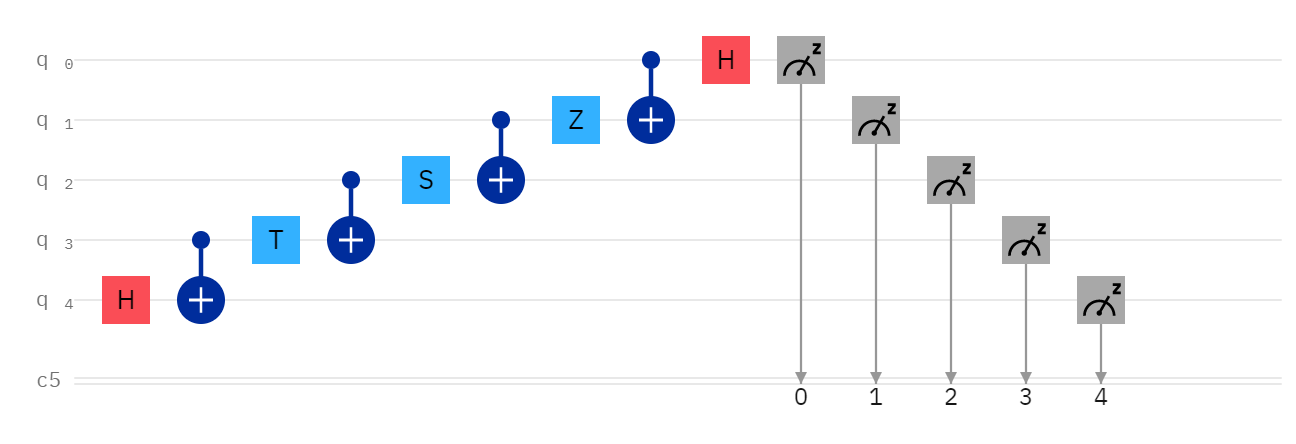

In [5]:
Image("circuit.png")

Импортируем параметры калибровки квантового процессора.

In [6]:
data_calibration = pandas.read_csv('ibmq_bogota_calibrations.csv')

In [7]:
data_calibration

Qubit  T1 (us)  T2 (us)  Frequency (GHz)  Anharmonicity (GHz)  \
0    Q0    98.32   154.93            5.000             -0.33689   
1    Q1    87.52    43.99            4.850             -0.32571   
2    Q2    99.64   132.58            4.783             -0.34287   
3    Q3    71.41   114.52            4.858             -0.32528   
4    Q4    89.86   179.56            4.978             -0.33796   

   Readout assignment error   Prob meas0 prep1   Prob meas1 prep0   \
0                     0.0175             0.0258             0.0092   
1                     0.0343             0.0482             0.0204   
2                     0.0137             0.0214             0.0060   
3                     0.0234             0.0404             0.0064   
4                     0.0206             0.0322             0.0090   

   Readout length (ns)  ID error   √x (sx) error   \
0             5048.889   0.000197        0.000197   
1             5048.889   0.000229        0.000229   
2             5048.889   0.000353        0.000353   
3             5048.889   0.000308        0.000308   
4             5048.889   0.000197        0.000197   

   Single-qubit Pauli-X error                  CNOT error   \
0                     0.000197                0_1:7.336e-3   
1                     0.000229  1_2:9.705e-3; 1_0:7.336e-3   
2                     0.000353  2_3:3.061e-2; 2_1:9.705e-3   
3                     0.000308  3_4:8.699e-3; 3_2:3.061e-2   
4                     0.000197                4_3:8.699e-3   

             Gate time (ns)  
0               0_1:689.778  
1  1_2:298.667; 1_0:654.222  
2  2_3:341.333; 2_1:334.222  
3  3_4:369.778; 3_2:305.778  
4               4_3:334.222

Одномерный массив ошибок однокубитных гейтов.

In [8]:
single_qubit_error = np.array(data_calibration['Single-qubit Pauli-X error '])

In [9]:
print(single_qubit_error)

[0.0001971 0.0002292 0.0003535 0.0003081 0.0001971]


Двухкубитный массив ошибок двухкубитных гейтов.

In [10]:
n = 5

In [11]:
CNOT_error = np.zeros((n, n))

In [12]:
CNOT_error[0, 1] = 7.336e-3
CNOT_error[1, 0] = 7.336e-3
CNOT_error[1, 2] = 9.705e-3
CNOT_error[2, 1] = 9.705e-3
CNOT_error[2, 3] = 3.061e-2
CNOT_error[3, 2] = 3.061e-2
CNOT_error[3, 4] = 8.699e-3
CNOT_error[4, 3] = 8.699e-3

In [13]:
print(CNOT_error)

[[0.       0.007336 0.       0.       0.      ]
 [0.007336 0.       0.009705 0.       0.      ]
 [0.       0.009705 0.       0.03061  0.      ]
 [0.       0.       0.03061  0.       0.008699]
 [0.       0.       0.       0.008699 0.      ]]


Два одномерных массива ошибок считывания.

In [14]:
prop_meas0_prep1 = np.array(data_calibration['Prob meas0 prep1 '])

In [15]:
print(prop_meas0_prep1)

[0.0258 0.0482 0.0214 0.0404 0.0322]


In [16]:
prop_meas1_prep0 = np.array(data_calibration['Prob meas1 prep0 '])

In [17]:
print(prop_meas1_prep0)

[0.0092 0.0204 0.006  0.0064 0.009 ]


Импортируем полученные на квантовом процессоре вероятности.

In [18]:
data_probability_ibm = np.array(pandas.read_csv('bar-chart.csv')['Frequency']) / 8192

In [19]:
print(data_probability_ibm)

[2.72827148e-01 2.59155273e-01 7.93457031e-03 1.14746094e-02
 1.46484375e-03 9.76562500e-04 1.46484375e-03 1.95312500e-03
 7.08007812e-03 5.98144531e-03 2.44140625e-04 2.44140625e-04
 4.88281250e-04 8.54492188e-04 3.66210938e-04 2.44140625e-04
 1.94824219e-01 2.00683594e-01 7.32421875e-04 8.05664062e-03
 1.70898438e-03 1.09863281e-03 1.22070312e-04 1.34277344e-03
 3.29589844e-03 5.37109375e-03 2.44140625e-04 0.00000000e+00
 1.09863281e-03 4.88281250e-04 2.44140625e-04 2.44140625e-04]


Приступим к симуляции данной квантовой схемы. Задаём число кубитов и размерность квантовой системы.

In [20]:
n = 5
d = 2 ** n

Определяем необходимые гейты.

In [21]:
I = np.array([[1, 0],
              [0, 1]], dtype=complex)
X = np.array([[0, 1],
              [1, 0]], dtype=complex)
Y = np.array([[0, -1j],
              [1j, 0]], dtype=complex)
Z = np.array([[1, 0],
              [0, -1]], dtype=complex)
H = (1 / np.sqrt(2)) * np.array([[1, 1],
                                 [1, -1]], dtype=complex)
T = np.array([[1, 0],
              [0, np.exp(1j * np.pi / 4)]], dtype=complex)
S = np.array([[1, 0],
              [0, 1j]], dtype=complex)
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]], dtype=complex)
pauli = [I, X, Y, Z]

Определяем функцию, которая выдаёт матрицы $i$-ую матрицу Крауса, соответствующую однокубитной ошибке для $k$-го кубита.

In [22]:
def kraus_1q(p, n, k, i):
    if i == 0:
        e = np.sqrt(1 - 3 * p / 4) * pauli[i]
    else:
        e = np.sqrt(p / 4) * pauli[i]
    E = np.kron(np.kron(np.eye(2 ** k, dtype=complex), e), np.eye(2 ** (n - k - 1), dtype=complex))
    return E

Определяем функцию, которая выдаёт матрицы ($i n + j$)-ую матрицу Крауса, соответствующую двухкубитной ошибке для $k$-го и ($k + 1$)-го кубита.

In [23]:
def kraus_2q(p, n, k, i, j):
    if (i == 0) and (j == 0):
        e = np.sqrt(1 - 15 * p / 16) * np.kron(pauli[i], pauli[j])
    else:
        e = np.sqrt(p / 16) * np.kron(pauli[i], pauli[j])
    E = np.kron(np.kron(np.eye(2 ** k, dtype=complex), e), np.eye(2 ** (n - k - 2), dtype=complex))
    return E

Определяем функцию, которая расширяет однокубитный гейт до пятикубитного.

In [24]:
def one_qubit_gate_n(gate, k, n):
    return np.kron(np.kron(np.eye(2 ** k, dtype=complex), gate), np.eye(2 ** (n - k - 1), dtype=complex))

Определяем функцию, которая расширяет двухкубитный гейт до пятикубитного.

In [25]:
def two_qubit_gate_n(gate, k, n):
    return np.kron(np.kron(np.eye(2 ** k, dtype=complex), gate), np.eye(2 ** (n - k - 2), dtype=complex))

Задаём начальное состояние в виде $|0\rangle \otimes \dots \otimes |0\rangle$.

In [26]:
psi_0 = np.zeros(d, dtype=complex)
psi_0[0] = 1.0

In [27]:
rho_0 = np.dot(psi_0.reshape((d, 1)), psi_0.reshape((1, d)))

Определяем функцию, которая производит однокубитное преобразование - сначала унитарную эволюцию, затем деполяризующий шум с помощью операторов Крауса.

In [28]:
def one_qubit_gate(rho, gate, k, n):
    gate = one_qubit_gate_n(gate, k, n)
    rho = gate @ rho @ gate.T.conjugate()
    rho_new = np.zeros((2 ** n, 2 ** n), dtype=complex)
    for i in range(4):
        p = single_qubit_error[k]
        rho_new += kraus_1q(p, n, k, i) @ rho @ kraus_1q(p, n, k, i).T.conjugate()
    return rho_new

Определяем функцию, которая производит двухкубитное преобразование - сначала унитарную эволюцию, затем деполяризующий шум с помощью операторов Крауса.

In [29]:
def two_qubit_gate(rho, gate, k, n):
    gate = two_qubit_gate_n(gate, k, n)
    rho = gate @ rho @ gate.T.conjugate() 
    rho_new = np.zeros((2 ** n, 2 ** n), dtype=complex)
    for i in range(4):
        for j in range(4):
            p = CNOT_error[k, k + 1]
            rho_new += kraus_2q(p, n, k, i, j) @ rho @ kraus_2q(p, n, k, i, j).T.conjugate()
    return rho_new

Производим преобразования согласно нашей схеме.

In [30]:
rho = one_qubit_gate(rho_0, H, 4, n)
rho = two_qubit_gate(rho, CNOT, 3, n)
rho = one_qubit_gate(rho, T, 3, n)
rho = two_qubit_gate(rho, CNOT, 2, n)
rho = one_qubit_gate(rho, S, 2, n)
rho = two_qubit_gate(rho, CNOT, 1, n)
rho = one_qubit_gate(rho, Z, 1, n)
rho = two_qubit_gate(rho, CNOT, 0, n)
rho = one_qubit_gate(rho, H, 0, n)

Определяем операторы измерения.

In [31]:
p_0 = np.array([[1, 0],
                [0, 0]], dtype=complex)
p_1 = np.array([[0, 0],
                [0, 1]], dtype=complex)

In [32]:
def meas_0(e_10, e_01):
    return (1 - e_10) * p_0 + e_01 * p_1

def meas_1(e_10, e_01):
    return e_10 * p_0 + (1 - e_01) * p_1

meas = [meas_0, meas_1]

Вычисляем вероятности измерения с учётом ошибки считывания. Ошибка считывания учитывается при построении операторов измерения. Вероятность измерения определённого набора $0$ и $1$ определяется формулой $\operatorname{Tr}(M_1 M_2 M_3 M_4 M_5 \rho)$.

In [33]:
data_probability_simulation = []
for i in range(d):
    bin_str = bin(i)[2:].zfill(n)
    m_0 = meas[int(bin_str[0])](prop_meas1_prep0[0], prop_meas0_prep1[0])
    m_0 = one_qubit_gate_n(m_0, 0, n)
    m_1 = meas[int(bin_str[1])](prop_meas1_prep0[1], prop_meas0_prep1[1])
    m_1 = one_qubit_gate_n(m_1, 1, n)
    m_2 = meas[int(bin_str[2])](prop_meas1_prep0[2], prop_meas0_prep1[2])
    m_2 = one_qubit_gate_n(m_2, 2, n)
    m_3 = meas[int(bin_str[3])](prop_meas1_prep0[3], prop_meas0_prep1[3])
    m_3 = one_qubit_gate_n(m_3, 3, n)
    m_4 = meas[int(bin_str[4])](prop_meas1_prep0[4], prop_meas0_prep1[4])
    m_4 = one_qubit_gate_n(m_4, 4, n)
    data_probability_simulation.append(np.trace(m_0 @ m_1 @ m_2 @ m_3 @ m_4 @ rho).real)

Строим гистограмму, сравнивающую вероятности, полученные с помощью квантового процессора ibmq_bogota и вероятности, полученные с помощью нашей симуляции.

<IPython.core.display.Javascript object>


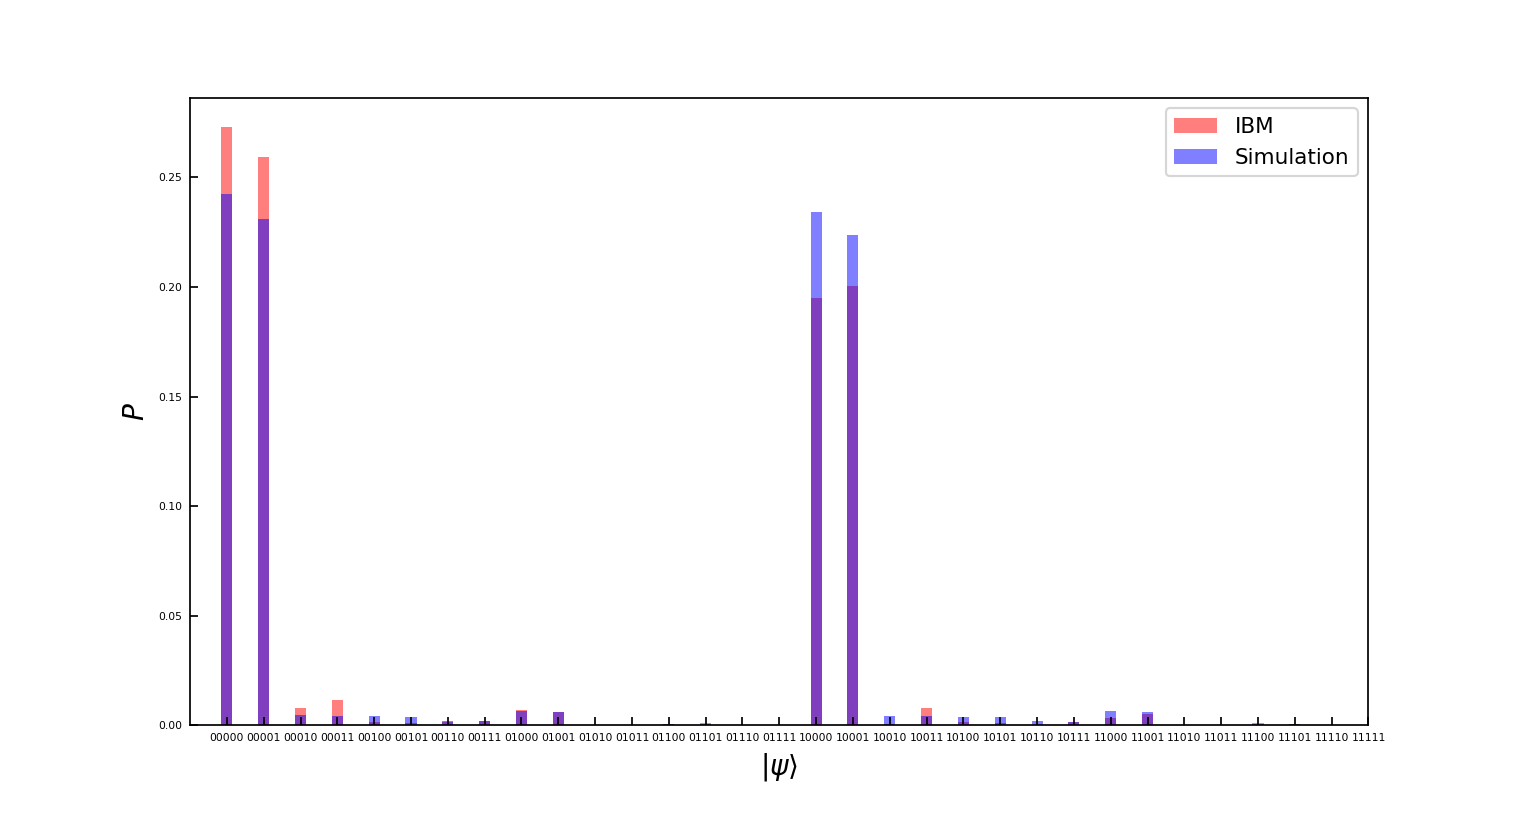

In [34]:
fig, ax = plt.subplots()
data_x = np.linspace(0, 31, 32)
data_x = [int(x) for x in data_x]
data_x = [bin(x)[2:].zfill(n) for x in data_x]
ax.bar(data_x, data_probability_ibm, width=0.3, color='red', alpha=0.5, label='IBM')
ax.bar(data_x, data_probability_simulation, width=0.3, color='blue', alpha=0.5, label='Simulation')

plt.tick_params(which='major', direction='in', labelsize=5)
plt.tick_params(which='minor', direction='in', labelsize=5)

plt.xlabel(r'$|\psi\rangle$', fontsize=13)
plt.ylabel(r'$P$', fontsize=13)

fig.set_figwidth(5)
fig.set_figheight(5)
plt.xlim(-1, 31)
plt.legend(loc='upper right')
plt.show()

Также построим таблицу, в которой эти вероятности приведены численно, и приведены модули разности.

In [35]:
data_x = np.linspace(0, 31, 32)
data_x = [int(x) for x in data_x]
rows = [bin(x)[2:].zfill(n) for x in data_x]
columns = ['Вероятности IBM', 'Вероятности нашей симуляции', 'Модуль разности']

In [36]:
data = np.array([data_probability_ibm, data_probability_simulation, np.abs(data_probability_simulation - data_probability_ibm)]).T

In [37]:
dataframe = pandas.DataFrame(data, columns=columns, index=rows)

In [38]:
dataframe

Вероятности IBM  Вероятности нашей симуляции  Модуль разности
00000         0.272827                     0.242236         0.030591
00001         0.259155                     0.231251         0.027904
00010         0.007935                     0.004492         0.003442
00011         0.011475                     0.004289         0.007186
00100         0.001465                     0.004069         0.002604
00101         0.000977                     0.003884         0.002908
00110         0.001465                     0.001862         0.000397
00111         0.001953                     0.001777         0.000176
01000         0.007080                     0.006528         0.000552
01001         0.005981                     0.006232         0.000251
01010         0.000244                     0.000125         0.000119
01011         0.000244                     0.000120         0.000124
01100         0.000488                     0.000673         0.000185
01101         0.000854                     0.000643         0.000212
01110         0.000366                     0.000060         0.000306
01111         0.000244                     0.000058         0.000186
10000         0.194824                     0.234325         0.039501
10001         0.200684                     0.223699         0.023016
10010         0.000732                     0.004346         0.003613
10011         0.008057                     0.004149         0.003908
10100         0.001709                     0.003936         0.002227
10101         0.001099                     0.003757         0.002659
10110         0.000122                     0.001801         0.001679
10111         0.001343                     0.001719         0.000376
11000         0.003296                     0.006315         0.003019
11001         0.005371                     0.006029         0.000658
11010         0.000244                     0.000121         0.000123
11011         0.000000                     0.000116         0.000116
11100         0.001099                     0.000651         0.000447
11101         0.000488                     0.000622         0.000133
11110         0.000244                     0.000058         0.000186
11111         0.000244                     0.000056         0.000188